In [1]:
import torch
device = 'cuda' if torch.cuda.is_available else 'cpu'
from agent import Agent, advanced_random_policy, random_policy, sarsa
from game import Game
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### In a first time, we train an agent for 2D tic-tac-toe using Q-learning with our modified SARSA algorithm

In [2]:
%%time
game = Game(None, None, n_dim=2, size=3)
agent = Agent(size=3)

n_eps = 20000
# Trains agent with the random policy
sarsa(game, agent, random_policy, alpha=0.45, alpha_factor=0.9995**(10000/n_eps), gamma=0.7, epsilon=1.0, \
      epsilon_factor=0.9997**(10000/n_eps), r_win=11.0, r_lose=0.0, r_even=1.0, r_even2=1.25, num_episodes=20000)

100%|██████████| 20000/20000 [04:59<00:00, 66.86it/s] 

Wall time: 4min 59s


We make our agent play 1000 games against the random policy

In [3]:
random_opponent = Agent(size=3, policy=random_policy)
game = Game(agent, random_opponent, n_dim=2, size=3)

agent_1_win, oppo_2_win, agent_1_even, agent_2_win, oppo_1_win, agent_2_even = game.simulate_games(1000)
tot_agent_win = agent_1_win + agent_2_win
tot_agent_lose = oppo_1_win + oppo_2_win
tot_even = agent_1_even + agent_2_even
print("On 1000 games, agent won", tot_agent_win, "times, lost", tot_agent_lose, "times and made", tot_even, "even games.")

On 1000 games, agent won 913 times, lost 0 times and made 87 even games.


Now we make our agent play 1000 games against the advanced policy

In [4]:
advanced_opponent = Agent(size=3, policy=advanced_random_policy)
game = Game(agent, advanced_opponent, n_dim=2, size=3)

agent_1_win, oppo_2_win, agent_1_even, agent_2_win, oppo_1_win, agent_2_even = game.simulate_games(1000)
tot_agent_win = agent_1_win + agent_2_win
tot_agent_lose = oppo_1_win + oppo_2_win
tot_even = agent_1_even + agent_2_even
print("On 1000 games, agent won", tot_agent_win, "times, lost", tot_agent_lose, "times and made", tot_even, "even games.")

On 1000 games, agent won 244 times, lost 0 times and made 756 even games.


We give the possibility to play against our agent

In [11]:
game = Game(agent, "Human player", n_dim=2, size=3) # agent plays first
#game = Game("Human player", agent, n_dim=2, size=3) # to play first
game.play_a_game()

. . . 
. . . 
. . . 

Agent plays : (1, 1) 

. . . 
. X . 
. . . 

Coordinates of next move : 0 1

. O . 
. X . 
. . . 

Agent plays : (0, 2) 

. O X 
. X . 
. . . 

Coordinates of next move : 2, 0

. O X 
. X . 
O . . 

Agent plays : (2, 2) 

. O X 
. X . 
O . X 

Coordinates of next move : 10

. O X 
O X . 
O . X 

Agent plays : (0, 0) 

X O X 
O X . 
O . X 

Game over. Score : (1, 0)
<agent.Agent object at 0x000002739FE0A370> wins !


(1, 0)

We can evaluate the performances of our agent depending on the number of training episodes

100%|██████████| 20000/20000 [02:43<00:00, 122.23it/s]


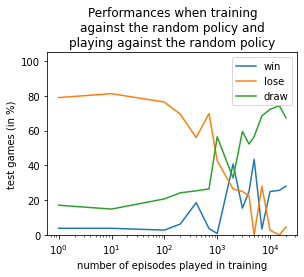

In [5]:
win, lose, draw, n_eps = [], [], [], []
for n in [1, 10, 100, 200, 400, 700, 1000, 2000, 3000, 4000, 5000, 7000, 10000, 15000, 20000]:
    ar = 0.9995**(10000/n)
    er = 0.9997**(10000/n)
    agent = Agent(size=3)
    advanced_opponent = Agent(size=3, policy=advanced_random_policy)
    game = Game(agent, advanced_opponent, n_dim=2, size=3)
    sarsa(game, agent, random_policy, alpha=0.45, alpha_factor=ar, gamma=0.7, epsilon=1.0, epsilon_factor=er, \
          r_win=11.0, r_lose=0.0, r_even=1.0, r_even2=1.25, num_episodes=n)
    win_p1_a, win_p2_a, tot_even_a, win_p1_b, win_p2_b, tot_even_b = game.simulate_games(10000)
    win.append(win_p1_a + win_p1_b)
    lose.append(win_p2_a + win_p2_b)
    draw.append(tot_even_a + tot_even_b)
    n_eps.append(n)
    
n_eps = np.array(n_eps)
fig = plt.figure(figsize=(0.7*6.4, 0.7*4.8))
plt.plot(n_eps, np.array(win)/100, label='win')
plt.plot(n_eps, np.array(lose)/100, label='lose')
plt.plot(n_eps, np.array(draw)/100, label='draw')
plt.xscale('log')
plt.xlabel('number of episodes played in training')
plt.ylabel('test games (in %)')
plt.ylim(0, 105)
plt.title('Performances when training\nagainst the random policy and\nplaying against the random policy')
plt.legend()

### Now, we show our Policy Gradient model for the 2D and 3D case
We start by the 2D case

We train our model with 10k iteration and batch size of 1000

In [6]:
import neuralAgent as na
device = 'cuda' if torch.cuda.is_available else 'cpu'

game = Game(None, None, n_dim=2, size=3)
agent1 = na.Model()
agent1, values, _, _, _ = na.train_network(agent1, game, 10000, 1000)
agent1.save()
print(values)

100%|██████████| 10000/10000 [01:10<00:00, 141.60it/s]

[array(0.23684864, dtype=float32), array(0.23684864, dtype=float32), array(0.2270721, dtype=float32), array(0.2270721, dtype=float32), array(0.23423481, dtype=float32), array(0.23423481, dtype=float32), array(0.23684695, dtype=float32), array(0.23684695, dtype=float32), array(0.21661209, dtype=float32), array(0.21661209, dtype=float32), array(0.21759208, dtype=float32), array(0.21759208, dtype=float32), array(0.22349189, dtype=float32), array(0.22349189, dtype=float32), array(0.22080824, dtype=float32), array(0.22080824, dtype=float32), array(0.2288791, dtype=float32), array(0.2288791, dtype=float32)]


We make our agent play 1000 games and then 10000 against the random policy

In [7]:
# Example of loading a saved agent
loaded_agent = na.Model()
loaded_agent.load()
wins, draw, loses = na.test_against_random(agent1, game, 1000)
print("Win {}, Draw {}, Loses {}".format(wins, draw, loses))

100%|██████████| 1000/1000 [00:06<00:00, 166.16it/s]

Win 814, Draw 42, Loses 144


In [8]:
wins, draw, loses = na.test_against_random(agent1, game, 10000)
print("Win {}, Draw {}, Loses {}".format(wins, draw, loses))

100%|██████████| 10000/10000 [01:00<00:00, 166.39it/s]

Win 8115, Draw 515, Loses 1370


#### Now the 3D case 

In [9]:
game = Game(None, None, n_dim=3, size=3)
agent1 = na.Model(3, 3)
agent1, values, _, _, _ =na.train_network(agent1, game, 10000, 1000)
#print(values)

100%|██████████| 10000/10000 [13:44<00:00, 12.12it/s]


We show its performances against the random policy

In [10]:
wins, draw, loses = na.test_against_random(agent1, game, 1000)
print("Win {}, Draw {}, Loses {}".format(wins, draw, loses))

100%|██████████| 1000/1000 [01:22<00:00, 12.16it/s]

Win 898, Draw 51, Loses 51
